### Linear Regression Analysis of Medical data
##### This workbook analyses various Linear Regression algorithms for Medical Cost/Insurance cost data from Kaggle (https://www.kaggle.com/mirichoi0218/insurance)
----------
<i> Author: Shailesh Kumar<br>
    Email: shailesh.kmr@gmail.com<br>
    Date: 15/03/2021</i>
------

<b>Import required libraries </b> <br>
<i>genericLRModelHandler contains : <br>
function genericLinearRegressionModelHandler) to apply and fit the model <br>
and contains function (printModelResult) to print/display results </i>
-----

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from genericLRModelHandler import genericLinearRegressionModelHandler, printModelResult

%matplotlib inline

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [31]:
df=pd.read_csv('insurance.csv')

In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

-----
<b>Preprocess and convert codes into numeric equivalents </b> <br>
<i><b>sex</b> and <b>smoker</b> are binary, so convert them to 0 and 1 <br>
<b>region</b> is converted into binary valued field, one for each region </i>
------

In [35]:
#preprocessing
le=LabelEncoder()
df['encoded_sex']=le.fit_transform(df['sex'])
df['encoded_smoker']=le.fit_transform(df['smoker'])
df=df.join(pd.get_dummies(df['region'], prefix='region'))

-----
<b>There is very high correlation between charges and smokers. Age and bmi are next. <br>
Among regions, southeast has most cost. This is also evident from the fact that southeast has most correlation with smokers and bmi.</b> <br>

------

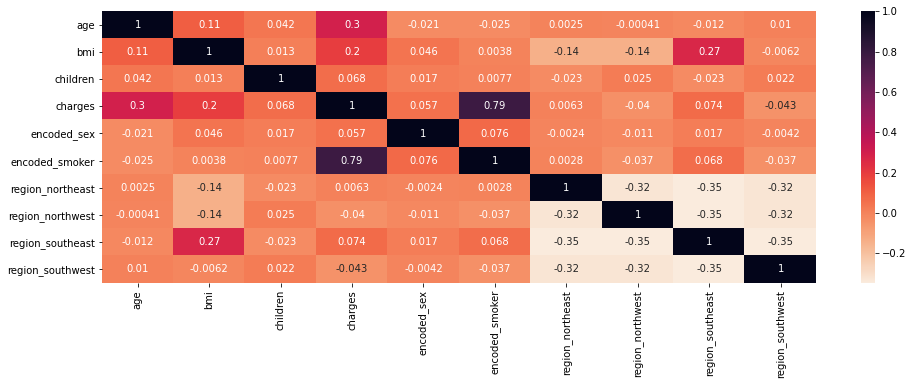

In [36]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)

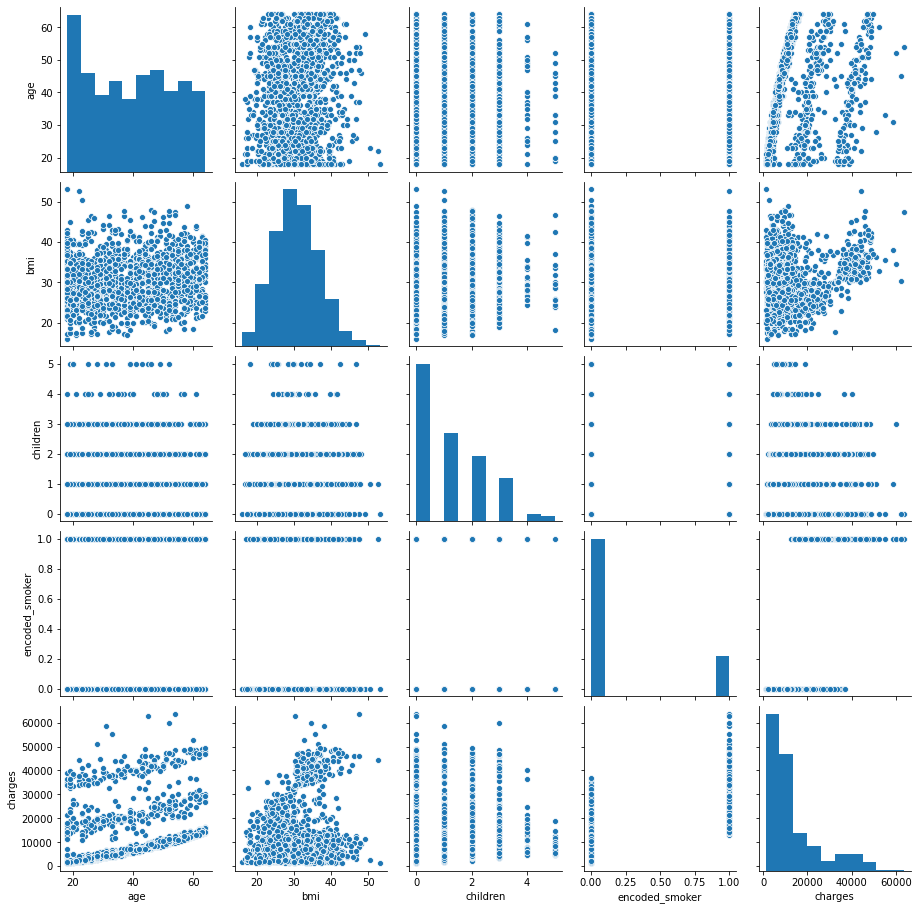

In [37]:
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'encoded_smoker', 'charges']])

-----
<b>Fit LinearRegression Model with age, bmi and smoker </b> <br>

------

{'intercept': -11694.647632928716, 'coefficient': {'age': 260.312155526768, 'bmi': 321.7843712504182, 'encoded_smoker': 23435.0362423841}, 'rmse': 5824.132116063316, 'model_score': 0.7872914737498631}


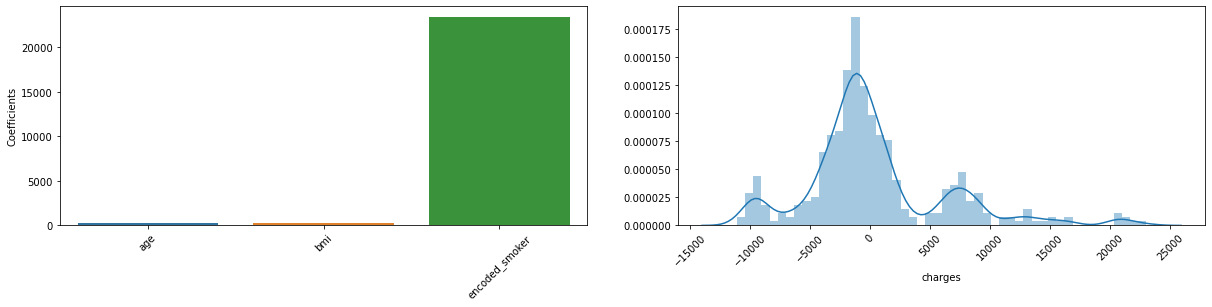

In [38]:
X=df[['age', 'bmi', 'encoded_smoker']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=1)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with age, bmi, smoker and children. There is only a very marginal increase in the score with inclusion of children </b> <br>

------

{'intercept': -12074.66977139282, 'coefficient': {'age': 257.8253098052106, 'bmi': 320.96180669920597, 'encoded_smoker': 23415.305340956867, 'children': 469.37053651183953}, 'rmse': 5794.602828376949, 'model_score': 0.7894429387120753}


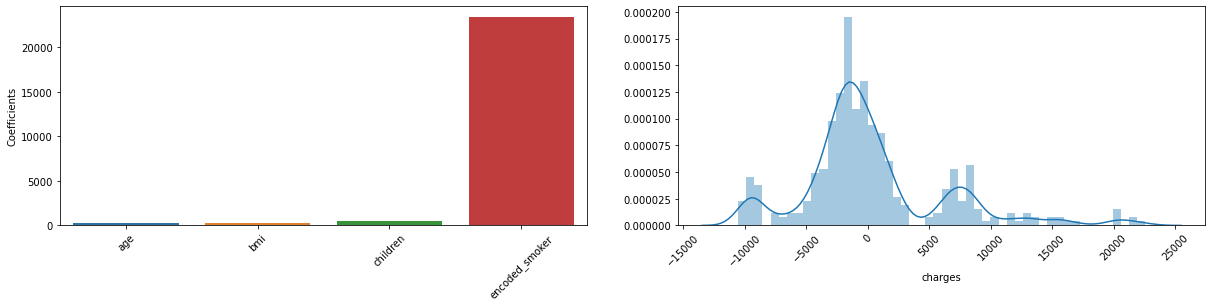

In [39]:
X=df[['age', 'bmi', 'encoded_smoker', 'children']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=1)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with all variables. There is only a very marginal increase in the score with inclusion of children </b> <br>

------

{'intercept': -12444.571712402763, 'coefficient': {'age': 256.46335793333395, 'bmi': 335.2703443568162, 'encoded_smoker': 23432.291291962712, 'children': 472.4458077545445, 'region_northeast': 588.3215830245848, 'region_northwest': 27.782030466249264, 'region_southeast': -406.276414982232, 'region_southwest': -209.82719850860747}, 'rmse': 5774.845905598221, 'model_score': 0.7908762959072757}


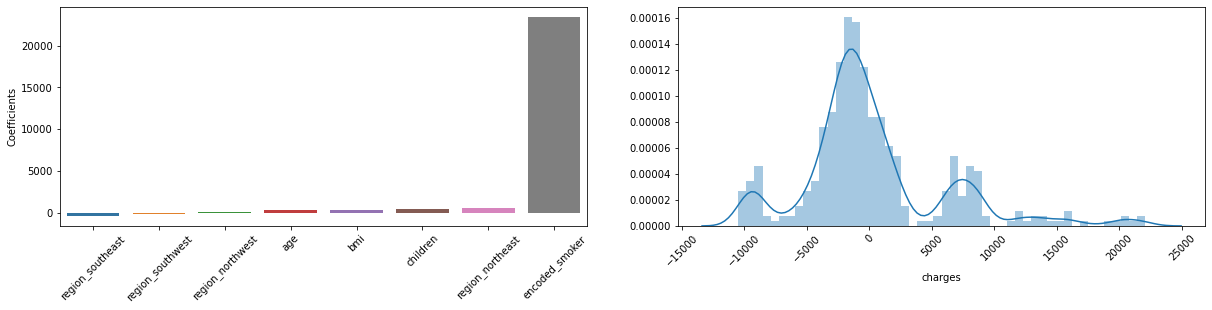

In [40]:
X=df[['age', 'bmi', 'encoded_smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=1)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with scaled age, bmi and children. There is no impact </b> <br>

------

{'intercept': -2311.2637599797, 'coefficient': {'scaled_age': 11859.96425103969, 'scaled_bmi': 11930.150355009473, 'encoded_smoker': 23415.305340956864, 'scaled_children': 2346.8526825592235}, 'rmse': 5794.602828376949, 'model_score': 0.7894429387120753}


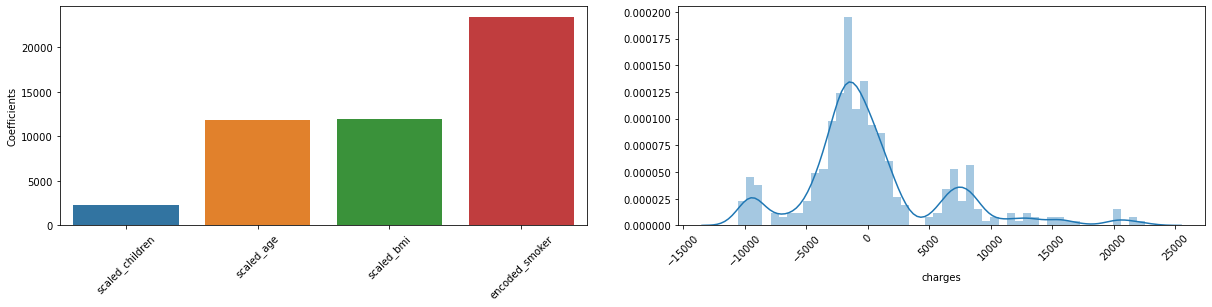

In [41]:
#Scale/Normalise Age, BMI and Children to see if it makes any difference
df['scaled_age']=preprocessing.minmax_scale(df['age'], feature_range=(0,1))
df['scaled_bmi']=preprocessing.minmax_scale(df['bmi'], feature_range=(0,1))
df['scaled_children']=preprocessing.minmax_scale(df['children'], feature_range=(0,1))

X=df[['scaled_age', 'scaled_bmi', 'encoded_smoker', 'scaled_children']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=1)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with age, bmi, smoker using Polynomial variables (degree=2). There is a huge improvememnt as this fits the model better. </b> <br>

------

{'intercept': -8833.69987388982, 'coefficient': {'1': 0.0, 'age': 132.9200662542048, 'bmi': 579.7305549857018, 'encoded_smoker': -9733.501175387304, 'age^2': 1.3055114979373583, 'age bmi': 1.1555690312035436, 'age encoded_smoker': 6.472786311611662, 'bmi^2': -9.607487478972358, 'bmi encoded_smoker': 1402.7920304586605, 'encoded_smoker^2': -9733.501175387273}, 'rmse': 4519.232131824615, 'model_score': 0.8719287165898516}


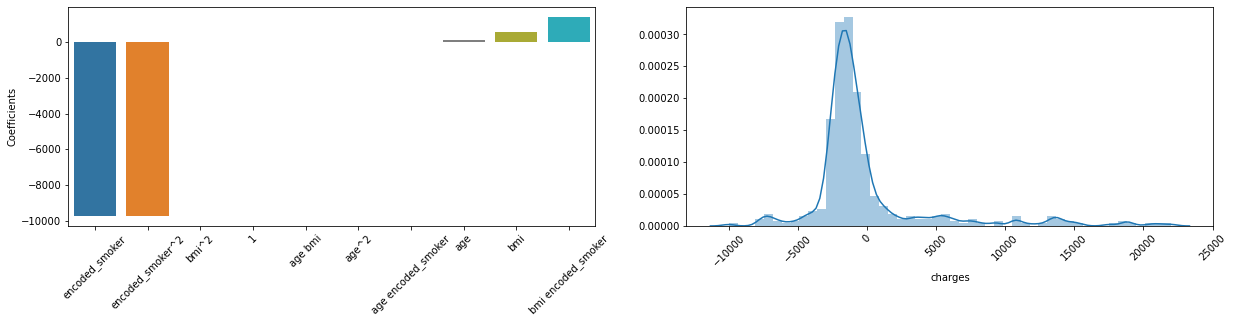

In [42]:
#Try with Polynomial values to see if that makes any difference
X=df[['age', 'bmi', 'encoded_smoker']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=2)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with age, bmi, smoker and children with Polynomial variables (degree 2). There is a very marginal improvement compared to previous result</b> <br>

------

{'intercept': -8062.393521834287, 'coefficient': {'1': 0.0, 'age': 23.883767073245917, 'bmi': 620.4072580898703, 'encoded_smoker': -9652.502349015995, 'children': 474.98337543138297, 'age^2': 2.7196477117685816, 'age bmi': 0.6234762498479831, 'age encoded_smoker': 9.460751399769032, 'age children': 11.700555537437365, 'bmi^2': -10.000426272943097, 'bmi encoded_smoker': 1403.0101745489126, 'bmi children': 0.41476437558700363, 'encoded_smoker^2': -9652.502349015984, 'encoded_smoker children': -281.9624039235579, 'children^2': -73.98294961550677}, 'rmse': 4464.117129793363, 'model_score': 0.8750334947519985}


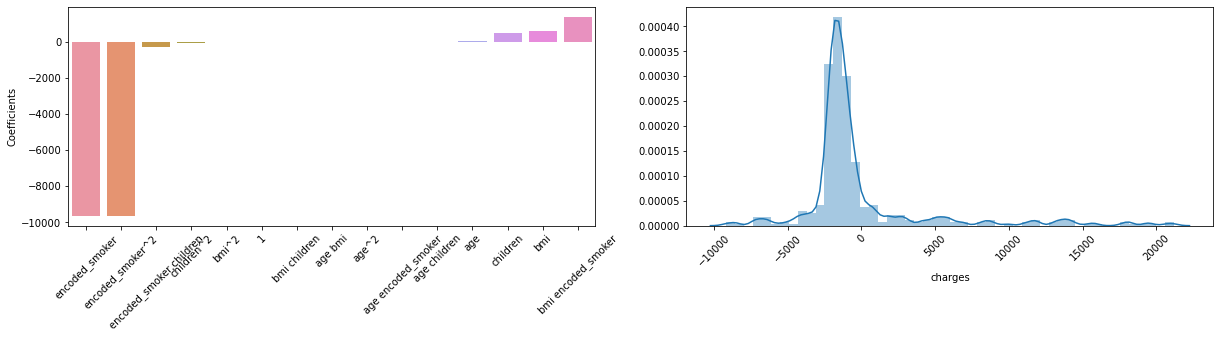

In [43]:
X=df[['age', 'bmi', 'encoded_smoker', 'children']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=2)
printModelResult(predict, y_test, model_result)

-----
<b>Fit LinearRegression Model with all variables using Polynomial degree (degree 2). There is a very marginal improvement compared to previous result</b> <br>

------

{'intercept': -7212.3111325727095, 'coefficient': {'1': 1.6751195207227552e-08, 'age': 41.86801376596158, 'bmi': 414.78952086040033, 'encoded_smoker': -8835.5936742654, 'children': 337.69585150292016, 'region_northeast': -46.197494239273475, 'region_northwest': -1322.592659465373, 'region_southeast': 663.0885779140342, 'region_southwest': 705.7015757901992, 'age^2': 2.7866193789910887, 'age bmi': -0.4019222684675932, 'age encoded_smoker': 6.872073598936966, 'age children': 7.533256869404196, 'age region_northeast': -26.032523540346688, 'age region_northwest': 9.513073974575626, 'age region_southeast': 30.432867939620284, 'age region_southwest': 27.95459539050704, 'bmi^2': -7.54143361498091, 'bmi encoded_smoker': 1429.131425820846, 'bmi children': 7.529178975191428, 'bmi region_northeast': 174.64457654140733, 'bmi region_northwest': 179.3307393674435, 'bmi region_southeast': 32.161719401561804, 'bmi region_southwest': 28.65248554976967, 'encoded_smoker^2': -8835.593674265348, 'encoded_s

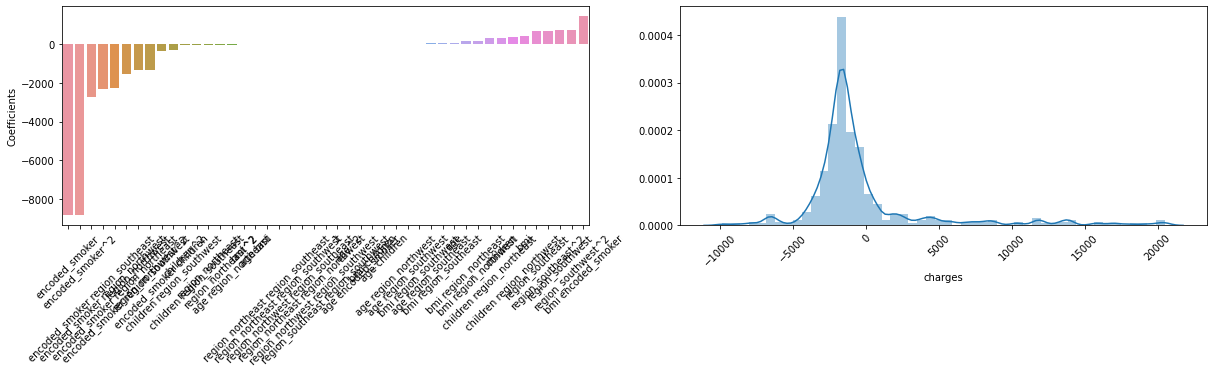

In [44]:
X=df[['age', 'bmi', 'encoded_smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]; y=df['charges']
predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(LinearRegression, X=X, y=y, degree=2)
printModelResult(predict, y_test, model_result)

alpha:  0.01
{'intercept': -11824.241375402808, 'coefficient': {'age': 255.0258051004829, 'bmi': 318.04556084841886, 'encoded_smoker': 23176.383885661588, 'children': 467.7535866477405}, 'rmse': 5804.473132976413, 'model_score': 0.788725018119991}
alpha:  0.03
{'intercept': -11337.97202548913, 'coefficient': {'age': 249.60654579159515, 'bmi': 312.3651488579697, 'encoded_smoker': 22712.894321606425, 'children': 464.42912107442567}, 'rmse': 5829.505560377428, 'model_score': 0.7868987956088275}
alpha:  0.05
{'intercept': -10870.226489403469, 'coefficient': {'age': 244.41432665170962, 'bmi': 306.87917437853724, 'encoded_smoker': 22267.60194391008, 'children': 461.001981755938}, 'rmse': 5860.78678897509, 'model_score': 0.7846056499768266}
alpha:  0.1
{'intercept': -9775.273838661475, 'coefficient': {'age': 232.33764159341243, 'bmi': 293.95416174078616, 'encoded_smoker': 21227.271390081372, 'children': 452.10533773863176}, 'rmse': 5960.787477584943, 'model_score': 0.7771925344547042}
alpha: 

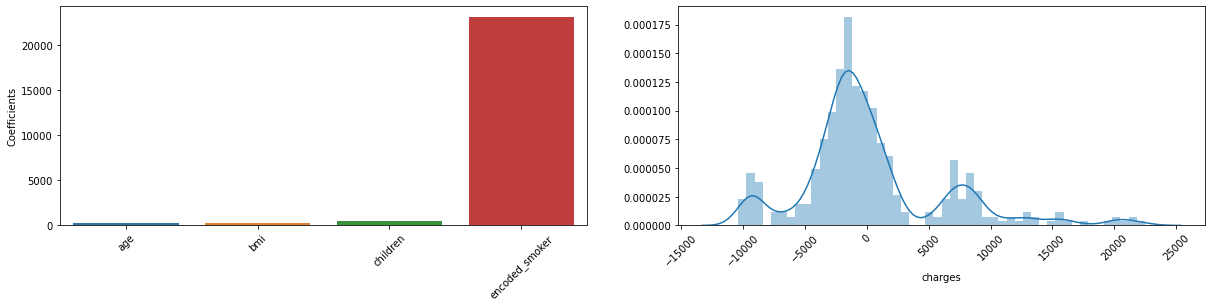

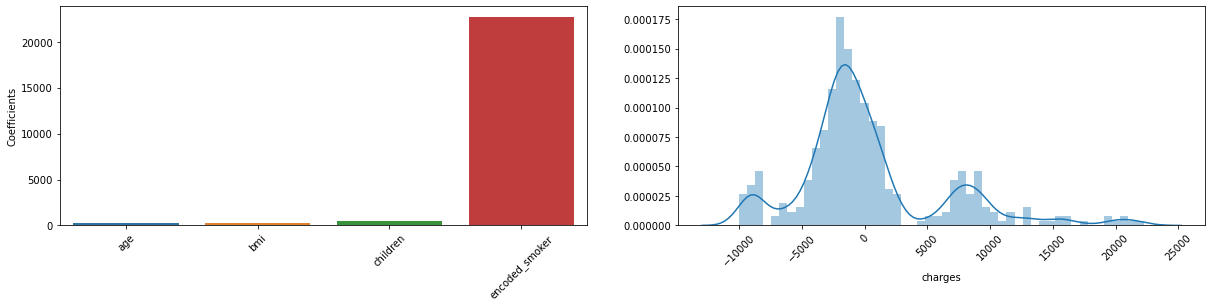

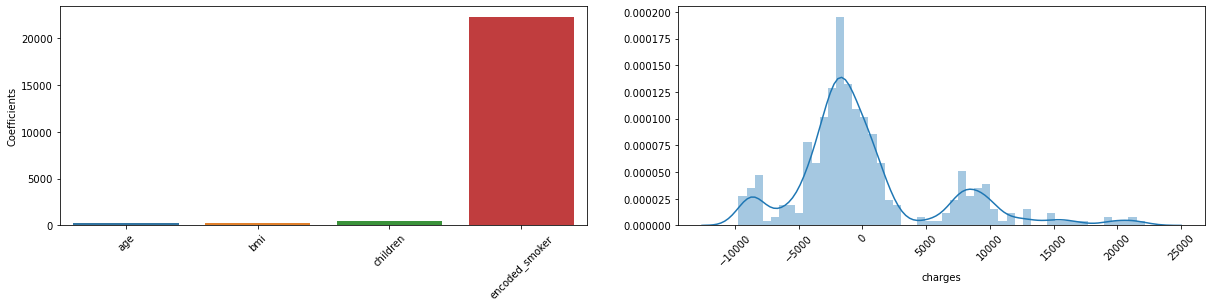

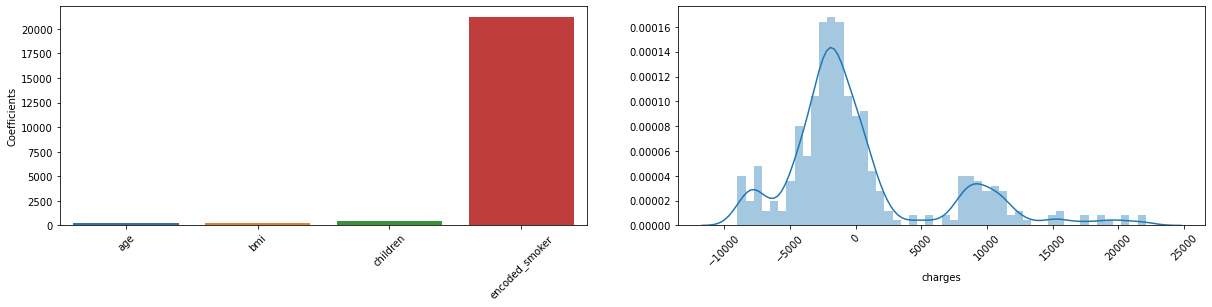

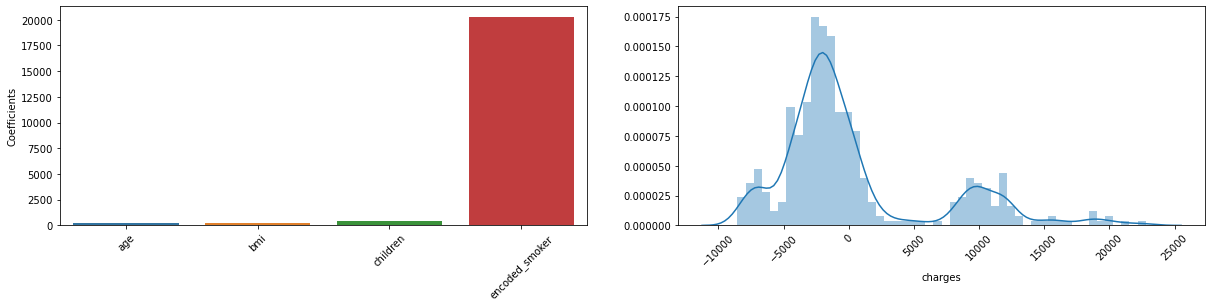

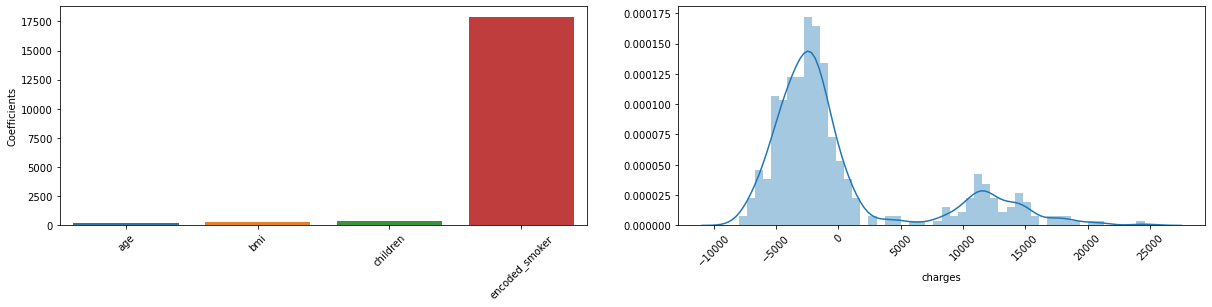

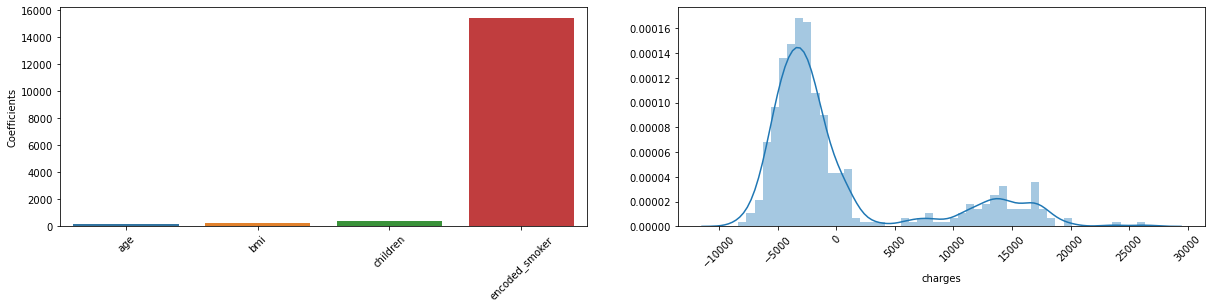

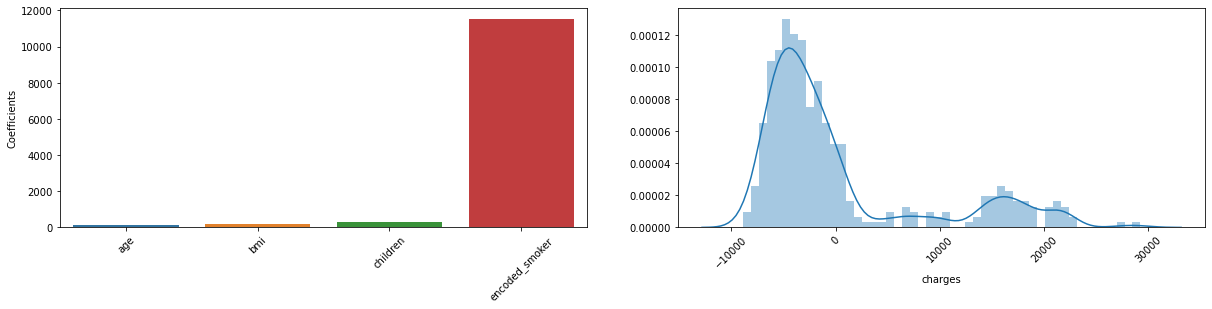

In [45]:
X=df[['age', 'bmi', 'encoded_smoker', 'children']]; y=df['charges']

for alpha in [0.01, 0.03, 0.05, 0.10, 0.15, 0.3, 0.5, 1]:
    predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(Ridge, X=X, y=y, degree=1, alpha=alpha, normalize=True)
    print('alpha: ', alpha); printModelResult(predict, y_test, model_result)

-----
<b>Use Ridge algorithm, to try with regularisation. Various values of alpha (regularisation parameter) is tried.</b> <br>

------

alpha:  0.01
{'intercept': -12072.123430301357, 'coefficient': {'age': 257.8061437785951, 'bmi': 320.9172028877755, 'encoded_smoker': 23414.491679332736, 'children': 469.136539474609}, 'rmse': 5794.634333936232, 'model_score': 0.7894406490862952}
alpha:  0.03
{'intercept': -12066.976407715456, 'coefficient': {'age': 257.7668004960755, 'bmi': 320.8275272569579, 'encoded_smoker': 23412.860030105116, 'children': 468.66932645409867}, 'rmse': 5794.697666069762, 'model_score': 0.7894360464677234}
alpha:  0.05
{'intercept': -12061.829385129551, 'coefficient': {'age': 257.727457213556, 'bmi': 320.73785162614024, 'encoded_smoker': 23411.228380877496, 'children': 468.20211343358824}, 'rmse': 5794.7612551441825, 'model_score': 0.7894314251255414}
alpha:  0.1
{'intercept': -12048.961828664802, 'coefficient': {'age': 257.62909900725725, 'bmi': 320.5136625490962, 'encoded_smoker': 23407.149257808447, 'children': 467.03408088231254}, 'rmse': 5794.921351891038, 'model_score': 0.7894197898542925}
alpha

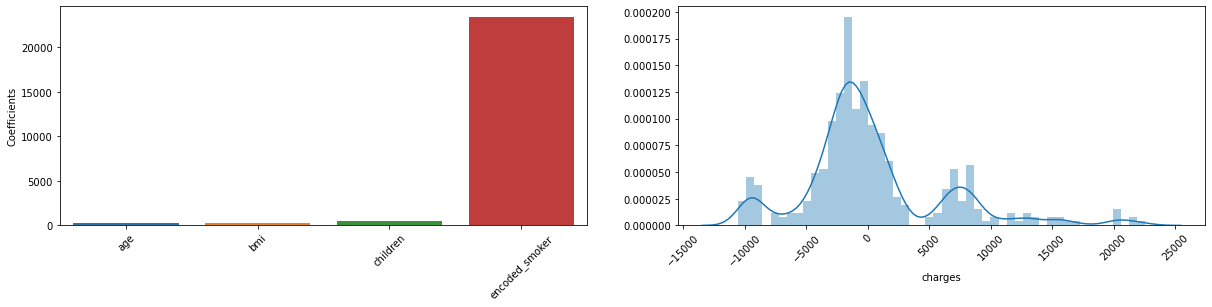

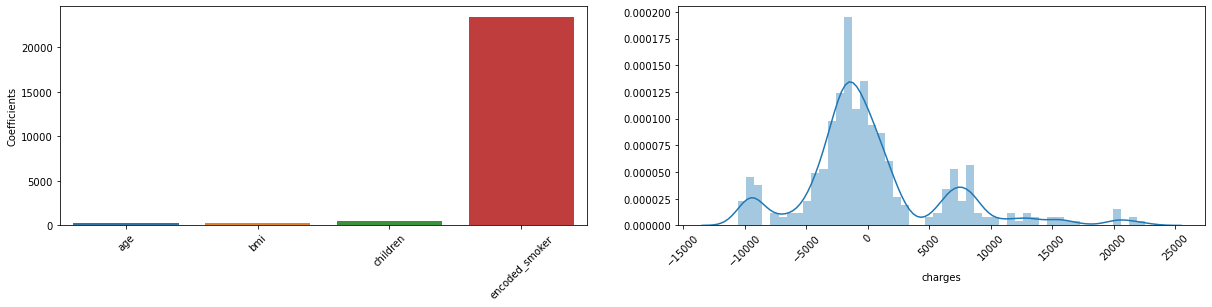

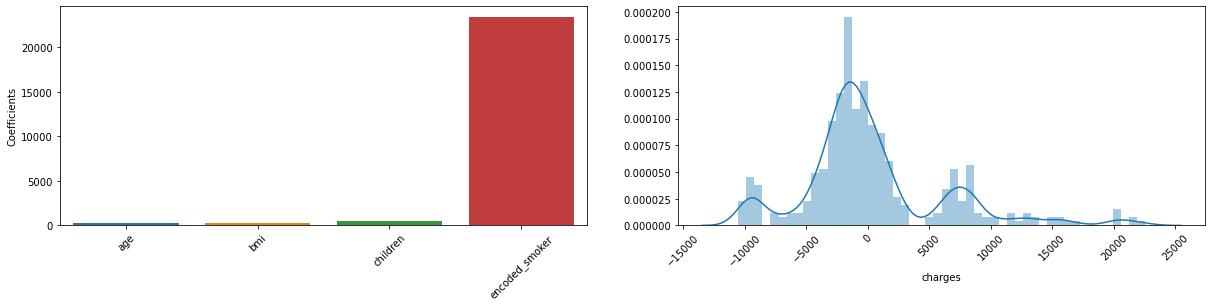

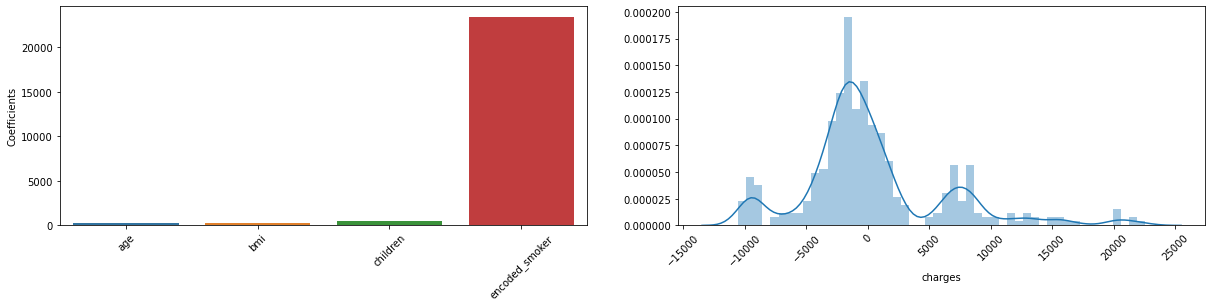

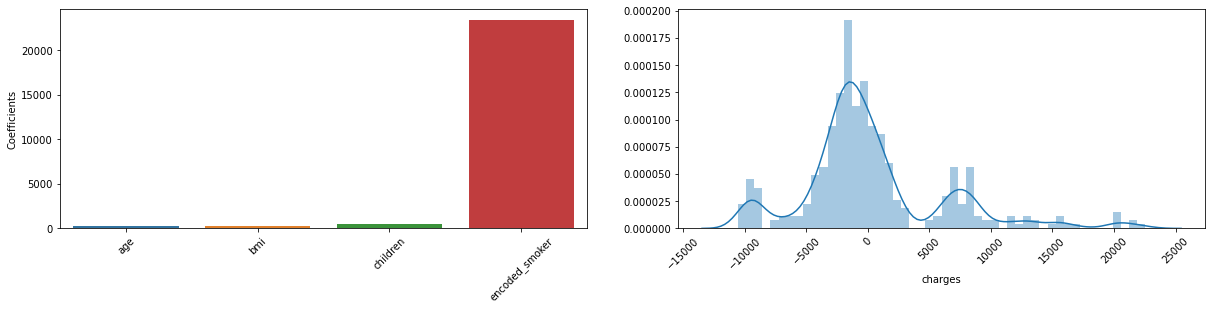

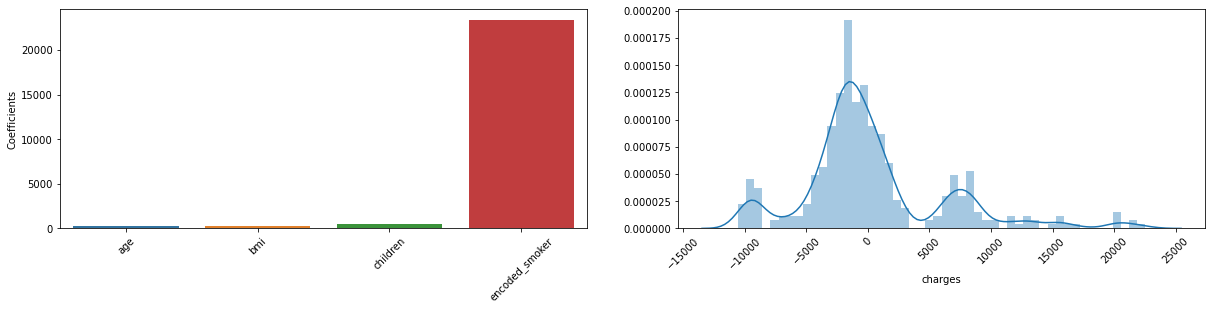

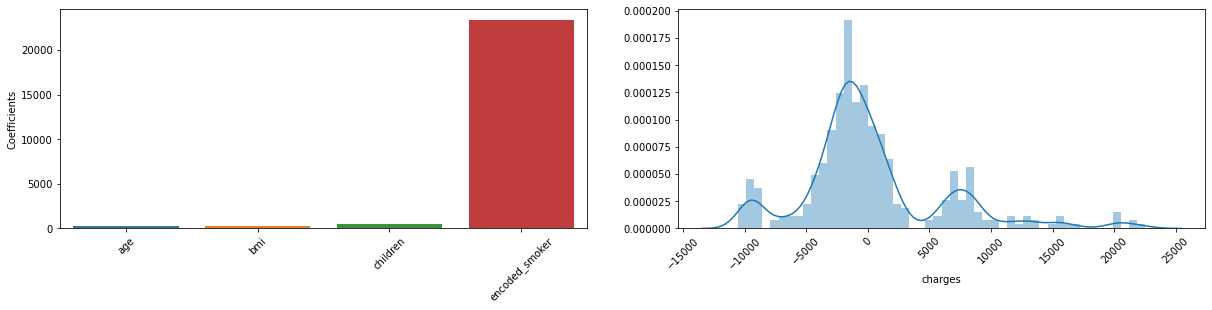

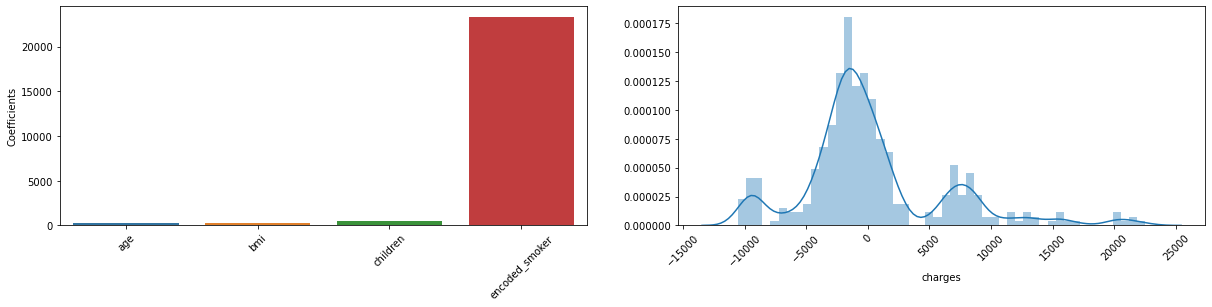

In [46]:
X=df[['age', 'bmi', 'encoded_smoker', 'children']]; y=df['charges']

for alpha in [0.01, 0.03, 0.05, 0.10, 0.15, 0.3, 0.5, 1]:
    predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(Lasso, X=X, y=y, degree=1, alpha=alpha, normalize=True)
    print('alpha: ', alpha); printModelResult(predict, y_test, model_result)

-----
<b>Use ElasticNet and try with various l1 ratios for a fixed value of alpha regularisation.</b> <br>

------

l1_ratio:  0.01
{'intercept': 12352.77129395301, 'coefficient': {'age': 8.245850254346228, 'bmi': 11.902974387902745, 'encoded_smoker': 790.3963507967753, 'children': 26.067059210363706}, 'rmse': 12306.89435935511, 'model_score': 0.050227899941636234}
l1_ratio:  0.03
{'intercept': 12335.274594821047, 'coefficient': {'age': 8.410224340101577, 'bmi': 12.13912650978383, 'encoded_smoker': 806.1299696929282, 'children': 26.578194338908187}, 'rmse': 12300.511666068554, 'model_score': 0.051212800249228474}
l1_ratio:  0.05
{'intercept': 12317.067892385483, 'coefficient': {'age': 8.5812870520197, 'bmi': 12.384842871700286, 'encoded_smoker': 822.5027647708247, 'children': 27.109793086586308}, 'rmse': 12293.870682800309, 'model_score': 0.05223701439304218}
l1_ratio:  0.1
{'intercept': 12268.14610379287, 'coefficient': {'age': 9.041029363063307, 'bmi': 13.044993619630011, 'encoded_smoker': 866.5004301970617, 'children': 28.536805882412047}, 'rmse': 12276.02984840929, 'model_score': 0.0549858009778

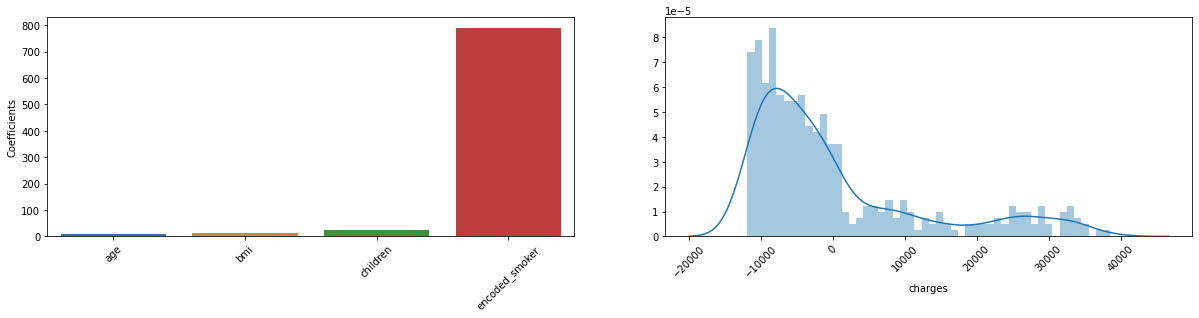

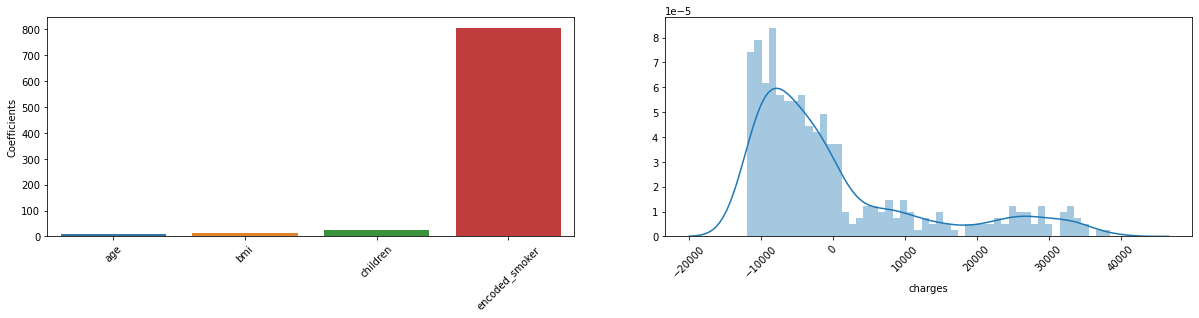

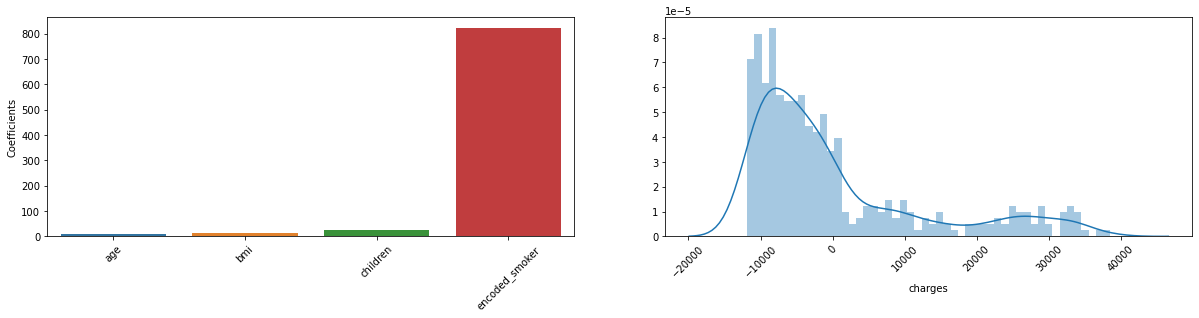

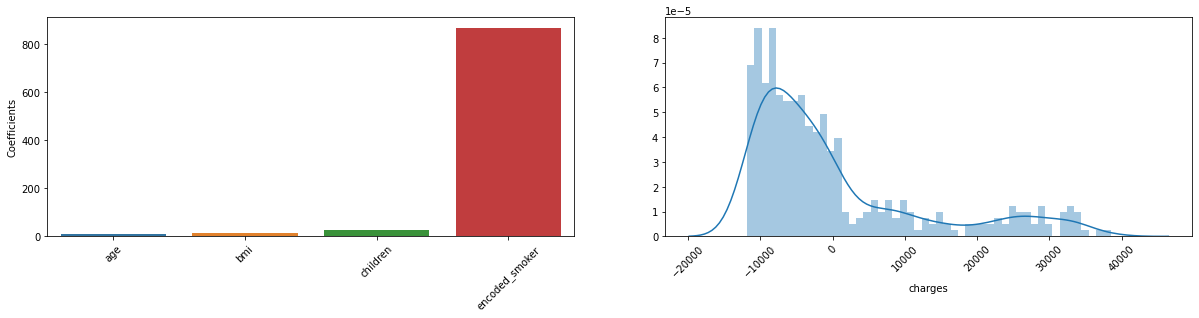

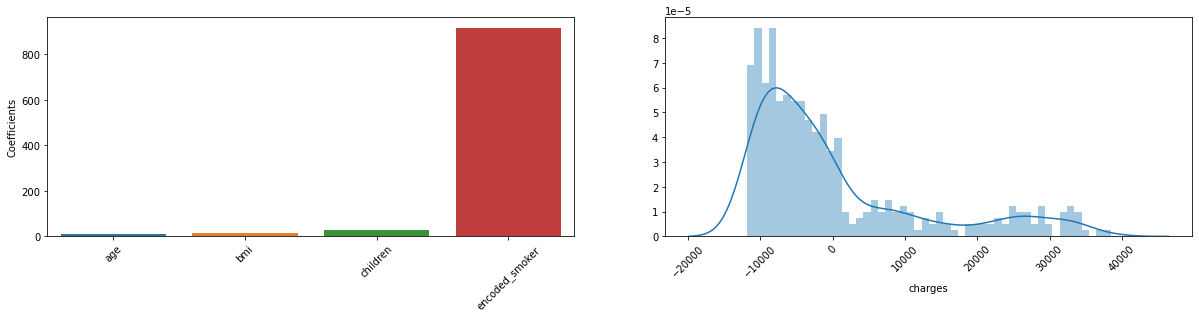

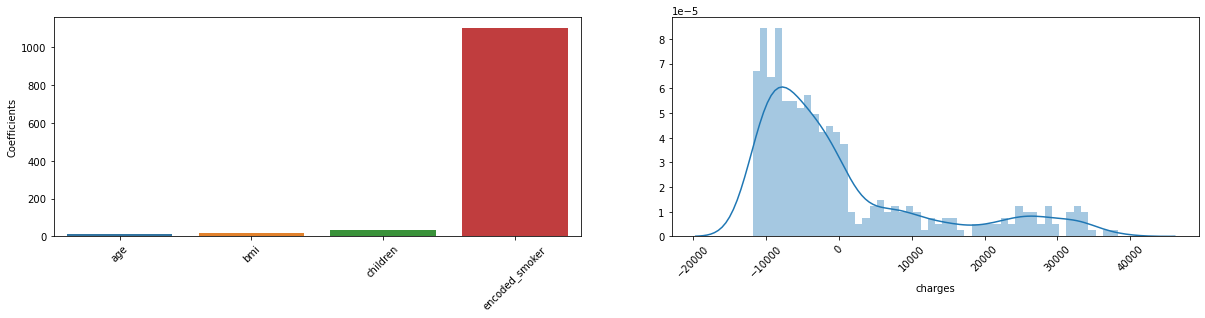

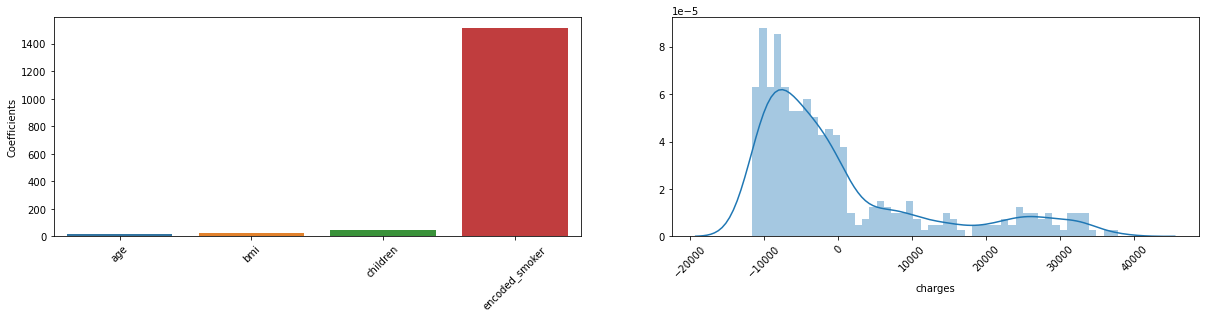

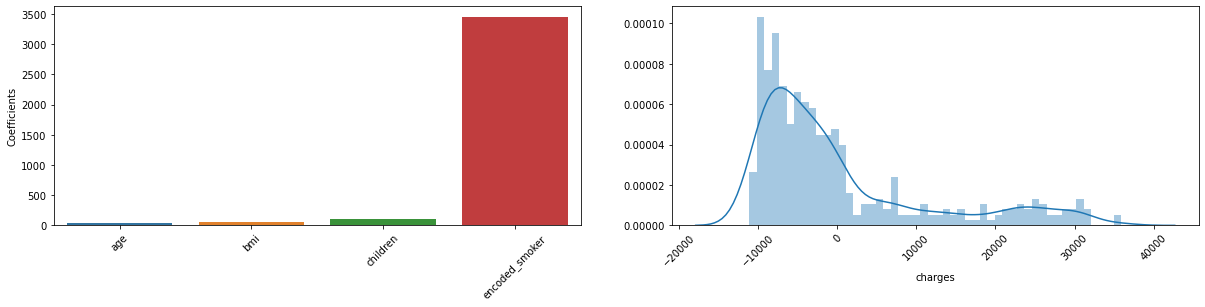

In [47]:
X=df[['age', 'bmi', 'encoded_smoker', 'children']]; y=df['charges']

alpha=0.03
for l1_ratio in [0.01, 0.03, 0.05, 0.10, 0.15, 0.3, 0.5, 0.8]:
    predict, X_train, X_test, y_train, y_test, model_result=genericLinearRegressionModelHandler(ElasticNet, X=X, y=y, degree=1, alpha=alpha, normalize=True, l1_ratio=l1_ratio)
    print('l1_ratio: ', l1_ratio); printModelResult(predict, y_test, model_result)